# Can we predict if a person has depression or not?

Megin van Herk

#### Ethical point of view:

At first thought this subject is indeed a questionable thing. Depression has always been a touchy subject. It is definetly a personal matter people dont like to talk about. Even though it is more an more common for people to have depression. In these troubling times. To help people, I want to predict if they have depression or not, or the chances of them having depression. So that hypothetically you could send help to someone with a high percentage chance of having depression

Smits et al. [5] found that anxiety symptoms, functional impairment, chronic illness, low mastery, low education and having no partner were the risk factors that best predicted depression risk. These studies echo the finding of initial symptoms being most strongly associated with the risk of depression.
BMC Psychiatry, https://bmcpsychiatry.biomedcentral.com/articles/10.1186/1471-244X-9-75

### Importantly, the researchers found that by feeding the heart rate data into an artificial intelligence program, the software was able to correctly identify the participants with depression and those without it.

so it has defenitly been done before, it did not have the suspected impact. I think people just dont believe what a machine can say about people. I asked a person who expierienced depression their opinion.

Wesley Donders, 19, diagnosed with depression:

As an entrepreneur in the arts of the depresso expresso I have this to say: while going to a psychologist you'll be told that random online tests are unreliable. Even the ones that they themselves use aren't always accurate, that's why they'll have you fill in 5 different tests all made by different PhD's. When those align then you could say there is somewhat of an accurate meassure. But there is also always a proper talk connected to this to see wheter there was any miscommunication in the tests and to see how the person reacts to certain things and to see where the depression might stem from. When a lesser test is presented to pupils at school they are very likely to lie, unless you truely want to know whether or not you have depression you will fill in false answers. Although the idea is well-meant the execution will be unreliable and might give false information, certainly when no one with a psychological expertise has been consulted. I wouldn't say it's impossible but to this day, a test with a 100% accuracy has not been made. It would be easier to read the brainwaves and the chemicals within the brain to get an accurate answer. There also other factors that you have to take into account like duration and the severity. 

reading this defenitly gives a different perspective to the matter, 

## Data requirements

####  Based on age gender etc.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
plt.style.use('seaborn')
sns.color_palette("husl", 8)

[(0.9677975592919913, 0.44127456009157356, 0.5358103155058701),
 (0.8087954113106306, 0.5634700050056693, 0.19502642696727285),
 (0.5920891529639701, 0.6418467016378244, 0.1935069134991043),
 (0.19783576093349015, 0.6955516966063037, 0.3995301037444499),
 (0.21044753832183283, 0.6773105080456748, 0.6433941168468681),
 (0.22335772267769388, 0.6565792317435265, 0.8171355503265633),
 (0.6423044349219739, 0.5497680051256467, 0.9582651433656727),
 (0.9603888539940703, 0.3814317878772117, 0.8683117650835491)]

The dataset is involved into the analysis of depression. The data was consists as a study about the life conditions of people who live in rurales zones.

In [5]:
df = pd.read_csv("b_depressed.csv")
df

,Survey_id,Ville_id,sex,Age,Married,Number_children,education_level,total_members,gained_asset,durable_asset,...,incoming_salary,incoming_own_farm,incoming_business,incoming_no_business,incoming_agricultural,farm_expenses,labor_primary,lasting_investment,no_lasting_investmen,depressed
0,926,91,1,28,1,4,10,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
1,747,57,1,23,1,3,8,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,1
2,1190,115,1,22,1,3,9,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
3,1065,97,1,27,1,2,10,4,52667108,19698904,...,0,1,0,1,22288055,18751329,0,7781123,69219765.0,0
4,806,42,0,59,0,4,10,6,82606287,17352654,...,1,0,0,0,53384566,20731006,1,20100562,43419447.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1424,255,22,1,25,1,1,7,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
1425,547,69,1,28,1,4,10,6,15711078,24023054,...,0,1,0,0,23022095,1021536,0,1823477,47384361.0,0
1426,893,184,1,66,0,0,1,1,42440731,22861940,...,0,1,0,0,12545373,10454478,0,46444572,10454478.0,1
1427,363,75,1,51,1,1,12,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0


Our target variable is depressed No(0) Yes(1)

Clear classification algorithm, is this depression or not?

# 🧹Cleaning the dataset

To make sure everything that we're looking at will be proper and look good, it's time to clean the dataset! After looking at the table above the first thing that we will be doing is 

In [6]:
df.columns

Index(['Survey_id', 'Ville_id', 'sex', 'Age', 'Married', 'Number_children',
       'education_level', 'total_members', 'gained_asset', 'durable_asset',
       'save_asset', 'living_expenses', 'other_expenses', 'incoming_salary',
       'incoming_own_farm', 'incoming_business', 'incoming_no_business',
       'incoming_agricultural', 'farm_expenses', 'labor_primary',
       'lasting_investment', 'no_lasting_investmen', 'depressed'],
      dtype='object')

In [10]:
df.isnull().sum()

Survey_id                 0
Ville_id                  0
sex                       0
Age                       0
Married                   0
Number_children           0
education_level           0
total_members             0
gained_asset              0
durable_asset             0
save_asset                0
living_expenses           0
other_expenses            0
incoming_salary           0
incoming_own_farm         0
incoming_business         0
incoming_no_business      0
incoming_agricultural     0
farm_expenses             0
labor_primary             0
lasting_investment        0
no_lasting_investmen     20
depressed                 0
dtype: int64

<Figure size 1080x360 with 0 Axes>

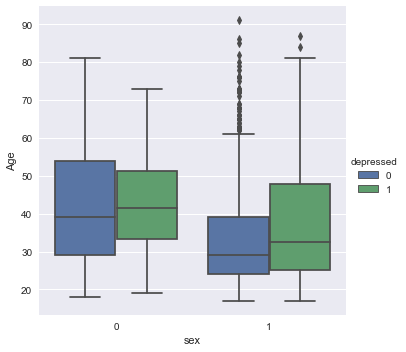

In [9]:
plt.figure(figsize=(15,5))
sns.catplot(x="sex", y="Age", hue="depressed", kind="box", data=df)

C:\Users\Gebruiker\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 56.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Figure size 1080x360 with 0 Axes>

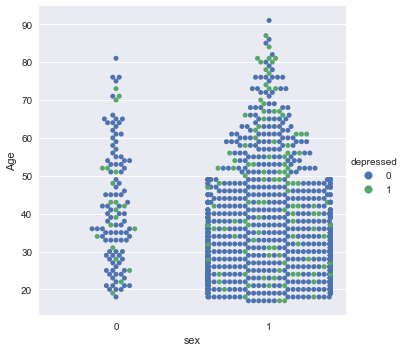

In [27]:
plt.figure(figsize=(15,5))
sns.catplot(x="sex", y="Age", hue="depressed", kind="swarm", data=df)

Some things to look at in comparion, 'sex', 'Age', 'Married','education_level','living_expenses','incoming_salary' with hue  'depressed'. 

## EDA

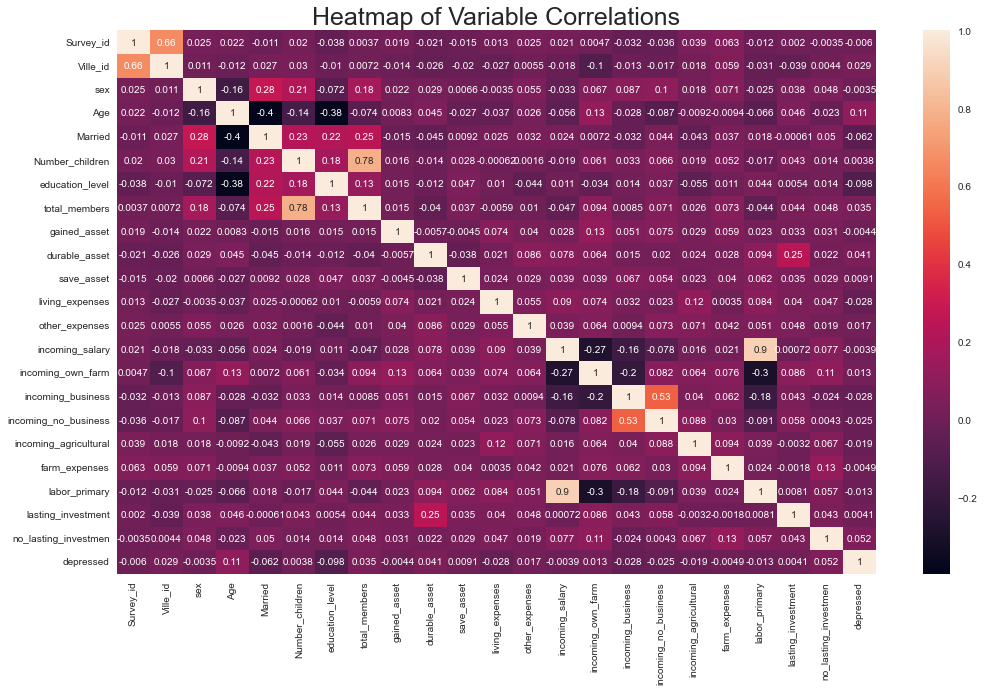

In [12]:
plt.figure(figsize=(17,10))
sns.heatmap(df.corr(),annot=True)
plt.title('Heatmap of Variable Correlations',fontsize=25)
plt.show()

<AxesSubplot:xlabel='count', ylabel='Age'>

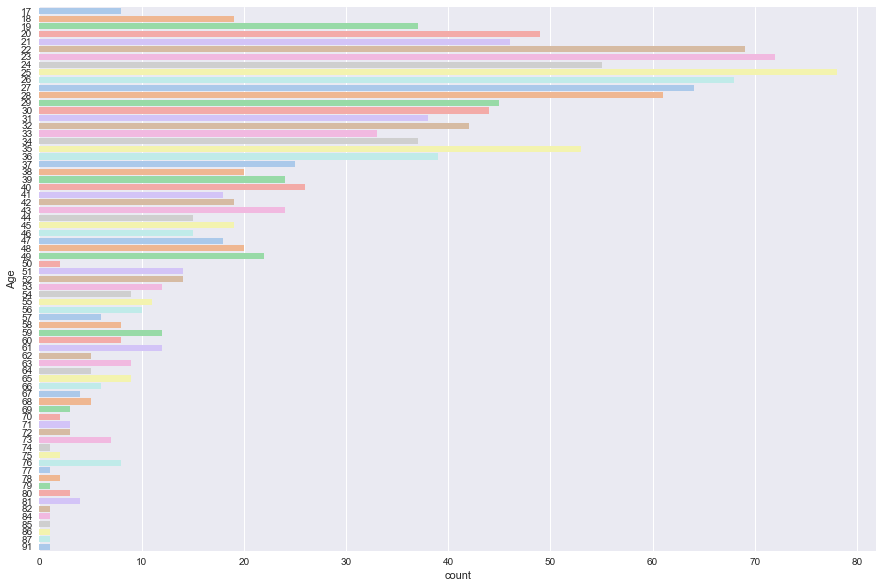

In [13]:
f, ax = plt.subplots(figsize=(15, 10))
sns.countplot(y="Age", data=df,
            palette="pastel")

A visualizer of the distribution of the age in our dataset

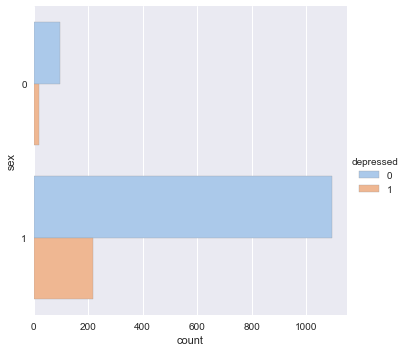

In [14]:
sns.catplot(y="sex", hue="depressed", kind="count",
            palette="pastel", edgecolor=".6",
            data=df)

In [15]:
df.depressed.value_counts()

0    1191
1     238
Name: depressed, dtype: int64

Here we can see there is allot more data on the 1 sex and more non-depressed than depressed.more non-depressed people than depressed in the dataset, might be able to see who doesnt have depression rather than who does.

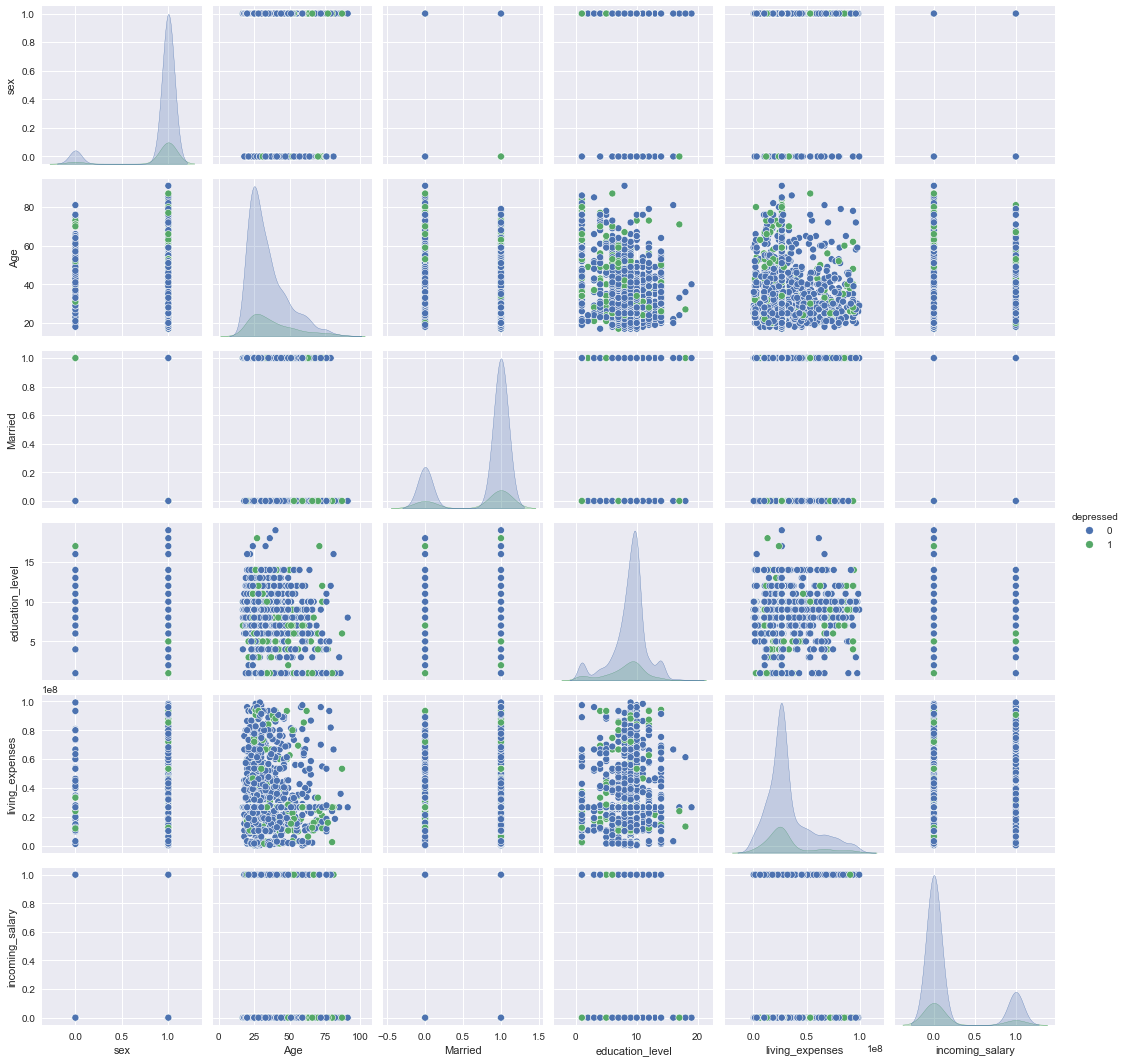

In [16]:
test = df[['sex', 'Age', 'Married','education_level','living_expenses','incoming_salary','depressed']]
sns.pairplot(test, hue="depressed")

<Figure size 1080x360 with 0 Axes>

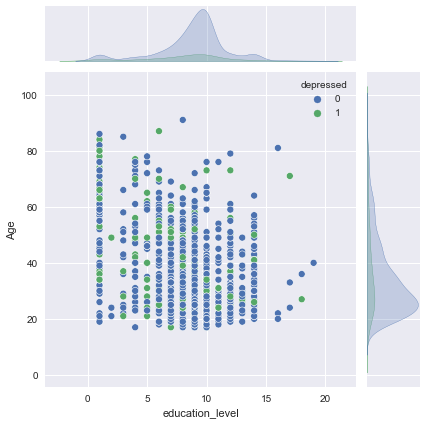

In [17]:
plt.figure(figsize=(15,5))
sns.jointplot(data=df, x="education_level", y="Age", hue="depressed")

Looking at these scatter plot, its highly likely nearest neighbor will not work.

<AxesSubplot:xlabel='depressed', ylabel='Number_children'>

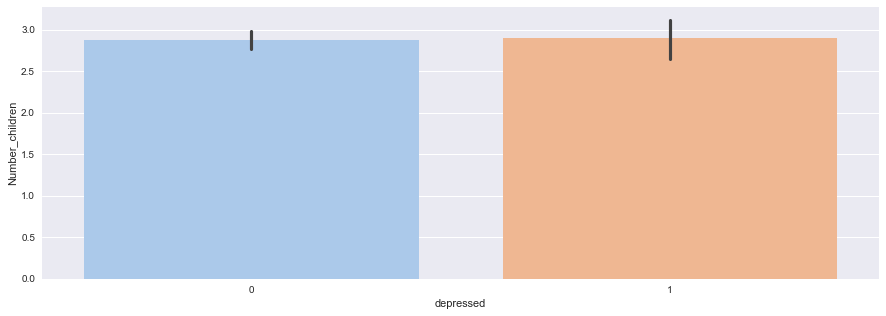

In [18]:
plt.figure(figsize=(15,5))
sns.barplot(x='depressed',y='Number_children',data=df,
            palette="pastel")

Here we can see number or children does not have impact on being depressed or not

Text(0.5, 1.0, 'Depressed vs Marital Status vs Gender')

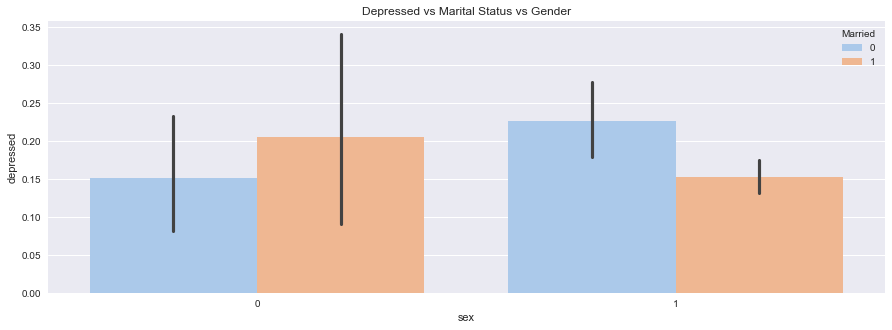

In [19]:
plt.figure(figsize=(15,5))
sns.barplot(x='sex',y='depressed',hue='Married',data=df,
            palette="pastel")
plt.title('Depressed vs Marital Status vs Gender')


Unmarried men are more depressed than married men. Married women are more depressed than unmarried women. 

<AxesSubplot:xlabel='depressed', ylabel='education_level'>

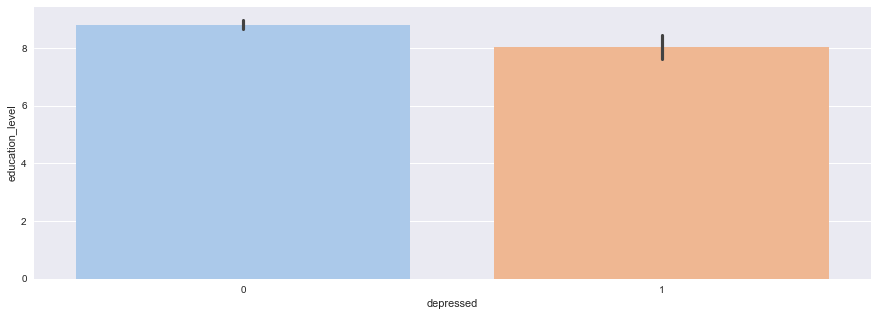

In [20]:
plt.figure(figsize=(15,5))
sns.barplot(x='depressed',y='education_level',data=df,
            palette="pastel")

This barplot shows that people with a higher education are slightly less depressed

## Modelling

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.Age, df.education_level, test_size=.3, random_state=0, stratify=df.depressed)